In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample

In [2]:
# Question 5
np.random.seed(1)

In [3]:
df = pd.read_excel("Default.xlsx")

In [4]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


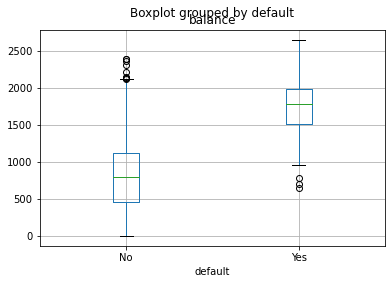

In [5]:
df.boxplot(['balance'], by = 'default');
# therefore, individual with higher credit card balance are more likely to default than individual with lower balance.
# This assessment is independent of their income.
# lets find whether an individual will default given their incomes and credit card balance by logistic regression after this.

In [6]:
# 5(a)
x = sm.add_constant(df[["balance", "income"]])
y = df["default"]
lr_clf = lr()
lr_clf.fit(x,y)
lr_clf.coef_

array([[-5.52286232e+00,  5.40961877e-03,  1.76634049e-05]])

In [7]:
# 5(b)
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size = 0.5, random_state = 312) 
# test_size — This parameter decides the size of the data that has to be split as the test dataset

In [18]:
np.shape(train_x)

(5000, 3)

In [19]:
np.shape(df)

(10000, 5)

In [20]:
lr_clf.fit(train_x,train_y)
lr_clf.coef_


array([[-1.10777003e-06,  3.51977730e-04, -1.25576107e-04]])

In [21]:
lr_clf.predict(test_x)
lr_clf.score(test_x,test_y)

0.9648

In [22]:
1 - lr_clf.score(test_x,test_y)
# For this train-test split, we had a validation set error of 0.0352 i.e. 3.52% of the observations in the validation set that are misclassified.


0.03520000000000001

In [23]:
# 5(c)
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.5, random_state = 223)

In [24]:
lr_clf = lr()
lr_clf.fit(train_x, train_y)
lr_clf.predict(test_x)
1 - lr_clf.score(test_x,test_y)

0.0262

In [25]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.5, random_state = 999)
lr_clf = lr()
lr_clf.fit(train_x, train_y)
lr_clf.predict(test_x)
1 - lr_clf.score(test_x,test_y)

0.02639999999999998

In [26]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.5, random_state = 3)
lr_clf = lr()
lr_clf.fit(train_x, train_y)
lr_clf.predict(test_x)
1 - lr_clf.score(test_x,test_y)

0.03400000000000003

In [27]:
(0.03520000000000001+0.031000000000000028+0.02639999999999998+0.03400000000000003)/4
# avg of above 4 errors is 0.03165

0.03165000000000001

In [28]:
(df['default'] !="No").mean()
# error in saying that noone will default is 0.0333

0.0333

In [29]:
(0.0333 - 0.03165)*100/0.0333
# thus, the model's test error is only around 5% less than the error in naively saying that noone will default.

4.954954954954971

In [30]:
# 5(d)
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [31]:
df["student_yes"] = (df["student"]=="Yes").astype(int)

In [32]:
df.head()

,Unnamed: 0,default,student,balance,income,student_yes
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,1
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0


In [33]:
x = df[["balance", "income", "student_yes"]]
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.5, random_state = 223)

In [34]:
lr_clf = lr()
lr_clf.fit(train_x, train_y)
lr_clf.predict(test_x)
1 - lr_clf.score(test_x, test_y)

0.031000000000000028

In [35]:
x = df[["balance", "income", "student_yes"]]
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.5, random_state = 3)
lr_clf = lr()
lr_clf.fit(train_x, train_y)
lr_clf.predict(test_x)
1 - lr_clf.score(test_x, test_y)

0.03400000000000003

In [36]:
x = df[["balance", "income", "student_yes"]]
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.5, random_state = 999)
lr_clf = lr()
lr_clf.fit(train_x, train_y)
lr_clf.predict(test_x)
1 - lr_clf.score(test_x, test_y)

0.03480000000000005

In [37]:
(0.031000000000000028+0.03400000000000003+0.03480000000000005)/3
# It is difficult to discern if the student predictor has improved the model because of the variation in results.

0.0332666666666667

In [75]:
# Question 6(a)
# using sklearn.linear_model
np.random.seed(2)
df["default_yes"] = (df["default"]=="Yes").astype(int)
y = df["default_yes"]
x = df[["balance", "income"]]
lr_clf = lr()
lr_clf.fit(x,y)
lr_clf.intercept_

array([-11.54047811])

In [84]:
lr_clf.coef_

array([[5.64710797e-03, 2.08091984e-05]])

In [79]:
# Alternatively: using Statsmodel

x_all = sm.add_constant(x)

# Logistic regression
model_logit = sm.Logit(y, x_all).fit();  

# Summary
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Jan 2021   Pseudo R-squ.:                  0.4594
Time:                        04:05:11   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

In [81]:
model_logit.bse["income"]
# Using the Logit class in StatsModels, the estimated standard error for the estimated coefficient of income is 4.985245461753027e-06


4.985245461753027e-06

In [82]:
model_logit.bse["balance"]
# Using the Logit class in StatsModels, the estimated standard error for the estimated coefficient of balance is 0.0002273813847684445


0.0002273813847684445

In [20]:
# 6(b)
def boot_fn(data, lr_clf): # input
    lr_clf.fit(x,y)
    return lr_clf.coef_    # output. Here return means that this will be displayed.

In [27]:
# 6(c): instead of boot(), we will use resample()
np.random.seed(17)
num_estimates = 10000
boot_estimates = np.empty((num_estimates, 2)) # means 2 columns and 10000 rows
for i in range(num_estimates):
    sample = resample(df)
    endog = (sample["default"] == "Yes").astype(int)
    exog = sm.add_constant(sample[["income", "balance"]])
    mod = sm.Logit(endog, exog)
    res = mod.fit(disp = False)
    boot_estimates[i, 0] = res.params["income"]
    boot_estimates[i, 1] = res.params["balance"]
sm_df = pd.DataFrame(boot_estimates, columns = ["income", "balance"])


In [54]:
sm_df

,income,balance
0,0.000020,0.005557
1,0.000024,0.005767
2,0.000030,0.005479
3,0.000024,0.005686
4,0.000016,0.005687
...,...,...
9995,0.000021,0.005558
9996,0.000018,0.005472
9997,0.000027,0.005513
9998,0.000021,0.005678


In [67]:
sm_df["income"].std()

4.85831314839359e-06

In [56]:
sm_df["balance"].std()

0.00022847275797215067

In [71]:
# Using the bootstrap, the estimated standard errors of the logistic regression coefficients for income and balance 
# are 4.858e-06 and 0.00022847

In [86]:
# 6(d): The standard errors obtained by the bootstrap appear to be a quite close to those obtained using the statistical formulas underlying the Logit class.
# i.e. for income: 4.858e-06 and 4.985e-06 and for balance 0.00022847 and 0.0002273 respectively in bootstrap and Logit cases

In [93]:
# Question 7
df = pd.read_csv("Weekly.csv")

In [94]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [100]:
# 7(a)
x = df[["Lag1", "Lag2"]]
y = df["Direction"]
lr_clf = lr()
res = lr_clf.fit(x,y)
res

LogisticRegression()

In [104]:
print(lr_clf.coef_, lr_clf.intercept_)

[[-0.03869814  0.06020749]] [0.22122502]


In [109]:
# 7(b)
df1 = df.drop([0])

In [125]:
x1 = df1[["Lag1", "Lag2"]]
y1 = df1["Direction"]
lr1 = lr()
res = lr1.fit(x1,y1)

In [114]:
print(lr1.coef_, lr1.intercept_)

[[-0.03840931  0.06080633]] [0.22324404]


In [131]:
# 7(c)
test_x = (df.loc[0, ["Lag1", "Lag2"]].to_frame().T)
test_y = (df.loc[0, ["Direction"]].to_frame().T)
te

In [140]:
lr1.predict(test_x)

array(['Up'], dtype=object)

In [154]:
lr1.predict_proba(df.loc[0, ["Lag1", "Lag2"]].to_frame().T) # to_frame() function is used to convert the given series object to a dataframe.
# posterior probability

array([[0.42861856, 0.57138144]])

In [142]:
df.loc[0]
# So the model incorrectly classified the 1st observation as 'Up' when in fact it is 'Down'.

Year             1990
Lag1            0.816
Lag2            1.572
Lag3           -3.936
Lag4           -0.229
Lag5           -3.484
Volume       0.154976
Today           -0.27
Direction        Down
Name: 0, dtype: object

In [175]:
# 7(d)
n = df.shape[0]
scores = np.empty(n)
clf = lr()
for i in range(n):
    x_new = df.loc[df.index !=i,["Lag1", "Lag2"]]
    y_new = df.loc[df.index !=i, ["Direction"]]
    clf.fit(x_new,y_new)
    scores[i] = clf.score(df.loc[i, ["Lag1", "Lag2"]].to_frame().T, pd.Series(df.loc[i, ["Direction"]]))
    

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [184]:
# 7(e)
error = 1 - scores.mean()
error
# error rate by loocv

0.4499540863177227

In [183]:
(df["Direction"]!="Up").mean()
# error rate if we predict all we go up

0.4444444444444444

In [182]:
# it is important to note that we get essentially the same error rate with a naive strategy of predicting that the market will go up every week.

In [21]:
# Question 8(a)
np.random.seed(1)
x = np.random.normal(size = 100)
y = x-2*x**2+np.random.normal(size = 100)
# n = 100 and p =1 i.e. 100 observations and one predictor. In equation, it is: y = x - 2x2 + c

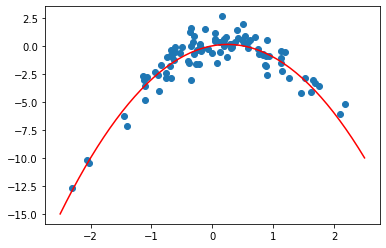

In [82]:
# 8(b)
plt.scatter(x,y);

# fix parabola in the figure
x_range = np.linspace(start = -2.5, stop = 2.5)
y_range = x_range-2*x_range**2
plt.plot(x_range, y_range, color = "red");

# Findings: While there is some noise, especially around the vertex of parabola for the model underlying the data, we can see that for the most part the scatterplot is fairly parabolic.
# Relationship between X and Y is quadratic


In [83]:
# 8(c)(d): Use R with function: glm and cv.glm()
#Findings: Results are exactly the same because LOOCV predicts every observation using the all of the rest (no randomness involved)
# Reason: The LOOCV errors for each model are the same as those computed in Part 3, even with a different seed. 
#       This makes sense since LOOCV does not involve any randomness. It always involves fitting a model 'Mi' using all of
#       the observations except for observation  𝑋𝑖 , computing the error between the predicted value  Y𝑖(hat^)  
#       obtained from the model Mi  and the actual value  𝑌𝑖 , and then taking the average of the errors over all  𝑛  models 
#       for the  𝑛  observations in the data set.


In [86]:
# 8(e): The quadratic model using X and X2 had the lowest error. This makes sense because the true model was generated using a quadratic formula
# 8(f): use R with function: lm()
# Finding: Summary shows that only X and X2 are statistically significant predictors. This agrees with the LOOCV results that indicate using only X and X^2 produces the best model.


In [92]:
# Question 9
from sklearn.datasets import load_boston
boston = load_boston()

In [100]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['medv'] = boston.target # the medv column is available in other attribute called target.
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [125]:
# 9(a)
u = df["medv"].mean()
u

22.532806324110698

In [117]:
# 9(b)
med_std = df["medv"].std()
med_std/(df.shape[0]**0.5)
# Findings: Standard Error is 0.4088611474975351 [Std. Error = std deviation/sqr.root of all observations]

0.4088611474975351

In [119]:
# 9(c)
np.random.seed(312)
n_bootstraps = 10000
means = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(df["medv"])
    means[i] = sample.mean()
print("Bootstrap estimate of mean: ", means.mean())
print("Bootstrap estimate of std. error: ", means.std(ddof = 1))
# Using the bootstrap with R=10000, we have an estimate of 0.409 for the standard error of u, whih is very close to 9(b)

Bootstrap estimate of mean:  22.52932887351779
Bootstrap estimate of std. error:  0.4096425744290965


In [127]:
# 9(d)
u - (2*0.4096425744290965)

21.713521175252506

In [128]:
u + (2*0.4096425744290965)

23.35209147296889

In [129]:
# 9(e)
u_med = df["medv"].median()
u_med

21.2

In [132]:
# 9(f)
np.random.seed(92)
n_bootstraps = 10000
medians = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(df["medv"])
    medians[i] = sample.median()
print("Bootstrap estimate of median: ", medians.mean())
print("Bootstrap estimate of std. error: ", medians.std(ddof = 1))

Bootstrap estimate of median:  21.187804999999997
Bootstrap estimate of std. error:  0.37814855759100885


In [135]:
# 9(g)
u_1 = df["medv"].quantile(0.1)
u_1

12.75

In [137]:
# 9(f)
np.random.seed(92)
n_bootstraps = 10000
quantile = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    sample = resample(df["medv"])
    quantile[i] = sample.quantile(0.1)
print("Bootstrap estimate of median: ", quantile.mean())
print("Bootstrap estimate of std. error: ", quantile.std(ddof = 1))

Bootstrap estimate of median:  12.759160000000001
Bootstrap estimate of std. error:  0.4989413679470413
